In [4]:
import pandas as pd 
import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict

plt.style.use("default")


In [5]:
known_shifts_df = pd.read_csv("/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Data/known_shifts.csv")
known_shifts_df

,Term,Meaning Before,Meaning After,Shift Date,Reason
0,tinder,"dry, flammable, wood, paper, ignite, fire","online, dating, application, matches, users, ...",2012-09-12,App launch date
1,zoom,"move, quickly, rush, fast, race, camera, magni...","meeting, video, software, program, communicati...",2012-09-10,App launch date
2,telegram,"message, letter, telegraph, written, printed, ...","messenger, freemium, cloud, instant, messaging...",2013-08-14,App launch date
3,twitch,"short, sudden, jerk, convulsion, movement, shi...","video, live, streaming, service, game, broadca...",2011-06-06,Platform launch
4,discord,"disagreement, strife, conflict, dispute, oppos...","instant, messaging, platform, users, communica...",2015-05-13,App launch date
5,teams,"group, players, game, sport, band, crew, toget...","meeting, chat, collaboration, workspace, busin...",2017-03-14,launch date
6,slack,"loose, sluggish, lax, inactive, slow, negligen...","cloud, freemium, platform, instant, messaging,...",2013-08-01,App launch date
7,stripe,"band, colour, color, line, mark, belt, chevron...","financial, service, software, company, payment...",2011-09-29,Service launch
8,snap,"break, sharp, quick, sudden, photo, bite, frea...","multimedia, instant, messaging, app, service, ...",2011-07-08,App launch date
9,swift,"quick, prompt, rapid, fast, instant, bird, ban...","paradigm, compiled, programming, language, dev...",2014-06-02,Programming language announcement


In [9]:
# List of model paths
model_paths = [
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model',
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model',
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_gendered_word2vec_model_100_percent.model"
]

Term:tinder
askreddit):
  Spearman Correlation: 0.7802197802197802, p-value: 0.0009944938002309496
Term:tinder
askmen):
  Spearman Correlation: 0.5757575757575757, p-value: 0.08155281477260236
Term:tinder
askwomen):
  Spearman Correlation: -0.06666666666666665, p-value: 0.8548130882487426
Term:zoom
askreddit):
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
Term:zoom
askmen):
  Spearman Correlation: 0.7575757575757575, p-value: 0.011143446799694208
Term:zoom
askwomen):
  Spearman Correlation: 0.5636363636363636, p-value: 0.08972402831709125
Term:telegram
askreddit):
  Spearman Correlation: 0.621978021978022, p-value: 0.017550315290540047
Term:telegram
askmen):
  Spearman Correlation: 0.3939393939393939, p-value: 0.25999776683488757
Term:telegram
askwomen):
  Spearman Correlation: 0.4545454545454545, p-value: 0.186904810349332
Term:twitch
askreddit):
  Spearman Correlation: 0.9604395604395607, p-value: 5.081053892329076e-08
Term:twitch
askmen):
  Spearman Corre

/home/ma/ma_ma/ma_sguliyev/thesis_venv/lib64/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Term:meta
askreddit):
  Spearman Correlation: 0.7934065934065934, p-value: 0.0007075341356182061
Term:meta
askmen):
  Spearman Correlation: -0.0303030303030303, p-value: 0.9337729580941466
Term:meta
askwomen):
  Spearman Correlation: 0.6484848484848483, p-value: 0.04254012768448945
Term:lightning
askreddit):
  Spearman Correlation: 0.5296703296703297, p-value: 0.05141659813787076
Term:lightning
askmen):
  Spearman Correlation: 0.8060606060606059, p-value: 0.004862061101964606
Term:lightning
askwomen):
  Spearman Correlation: -0.16363636363636364, p-value: 0.6514773427962428
Term:eats
askreddit):
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
Term:eats
askmen):
  Spearman Correlation: 0.7212121212121211, p-value: 0.018573155089460208
Term:eats
askwomen):
  Spearman Correlation: 0.4424242424242424, p-value: 0.20042268671194224
Term:spark
askreddit):
  Spearman Correlation: 0.2879120879120879, p-value: 0.3181928710258003
Term:spark
askmen):
  Spearman Correlation:

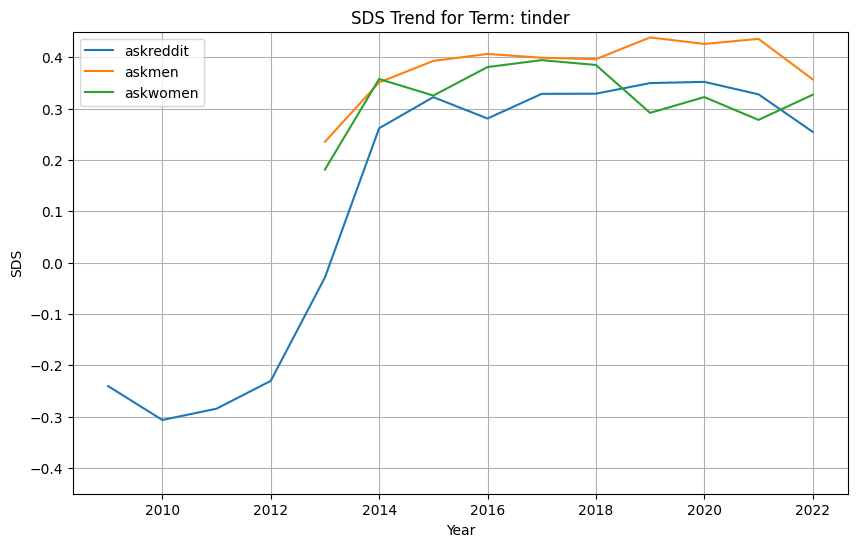

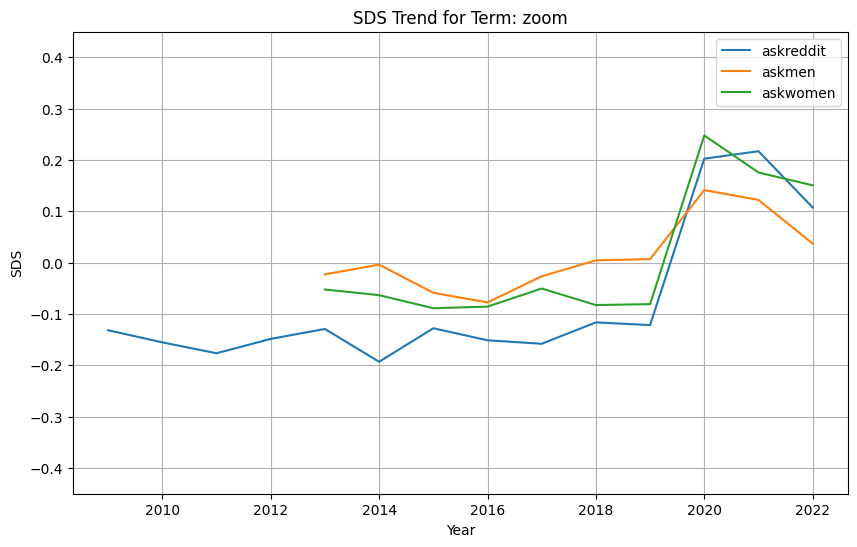

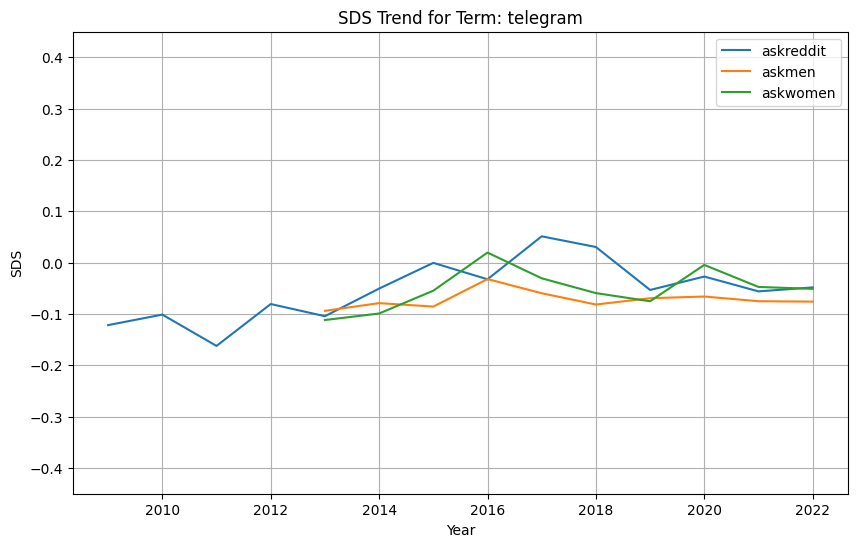

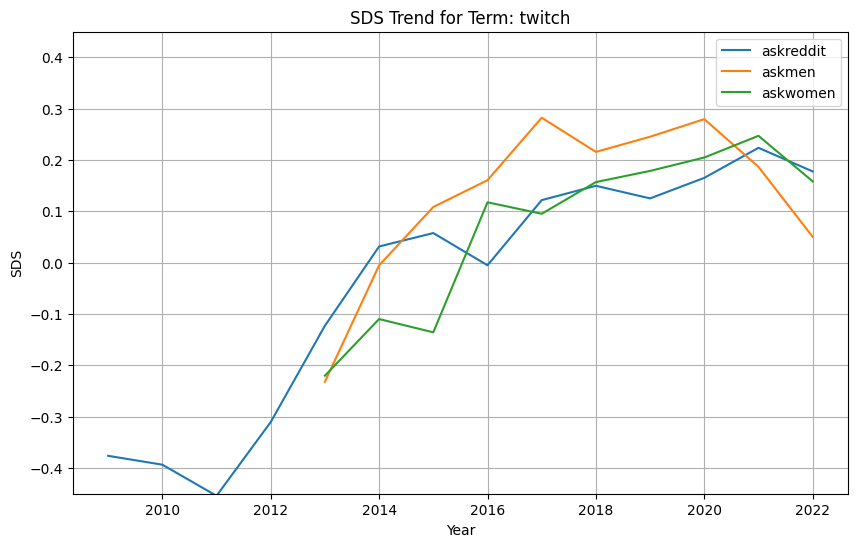

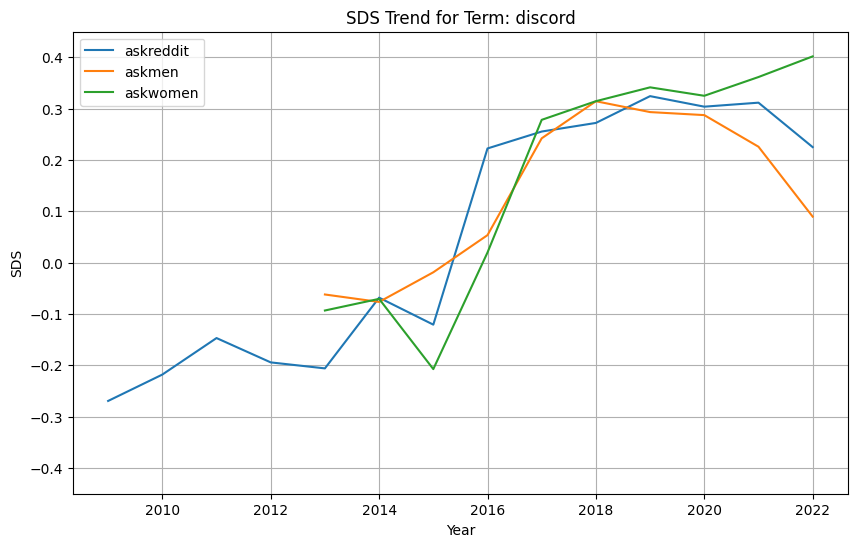

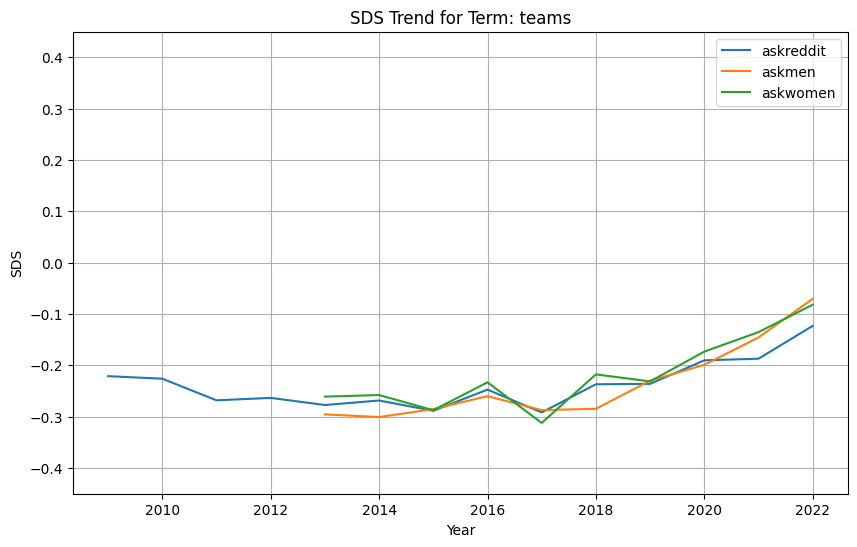

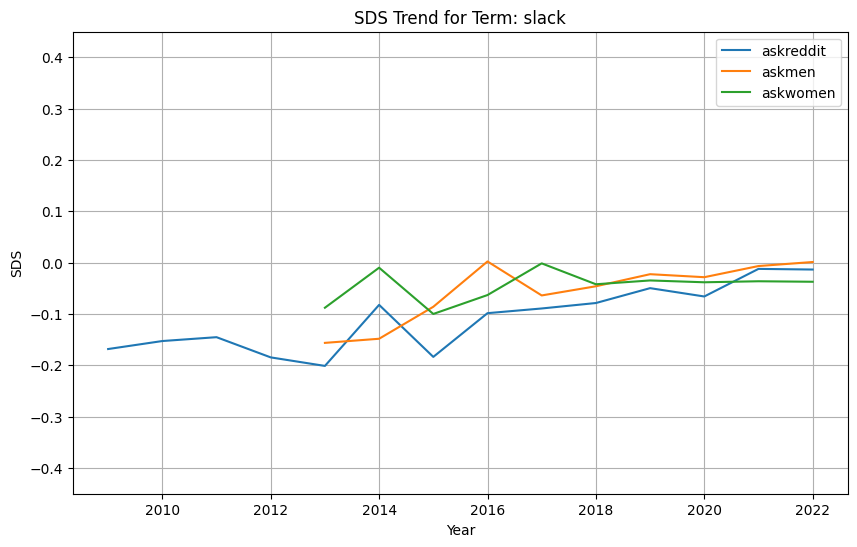

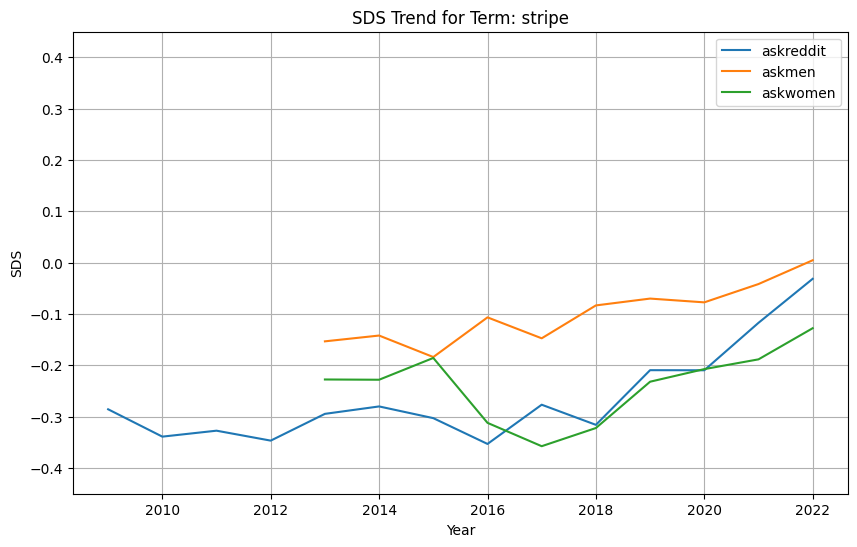

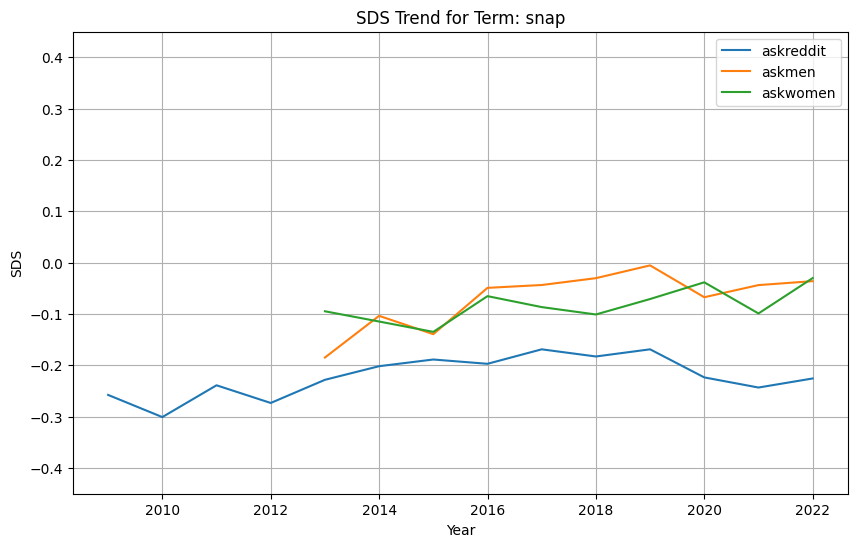

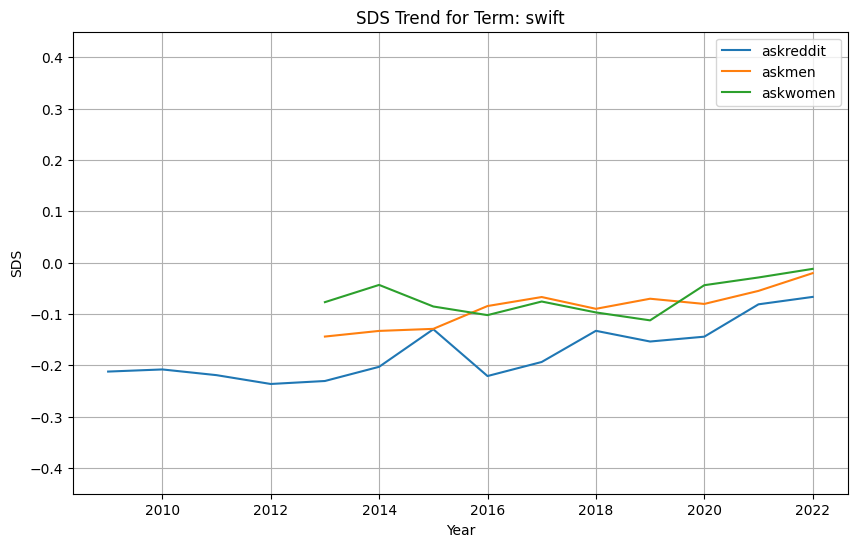

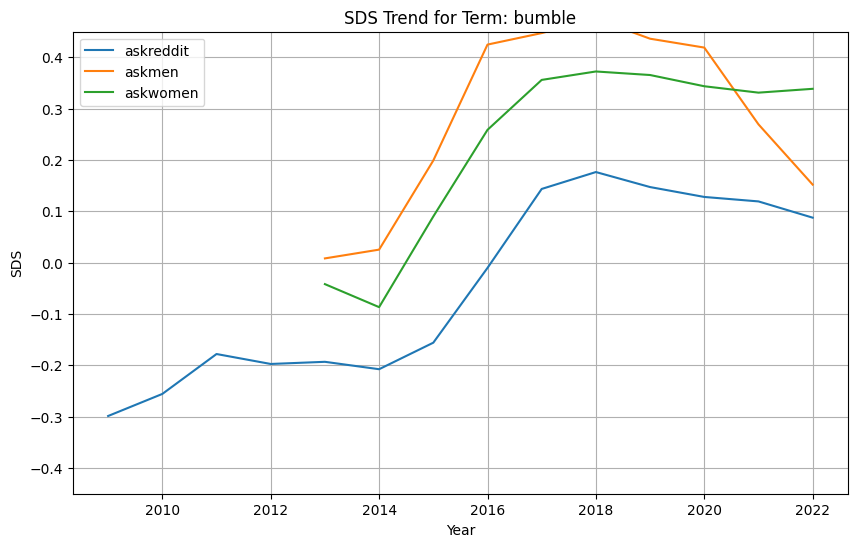

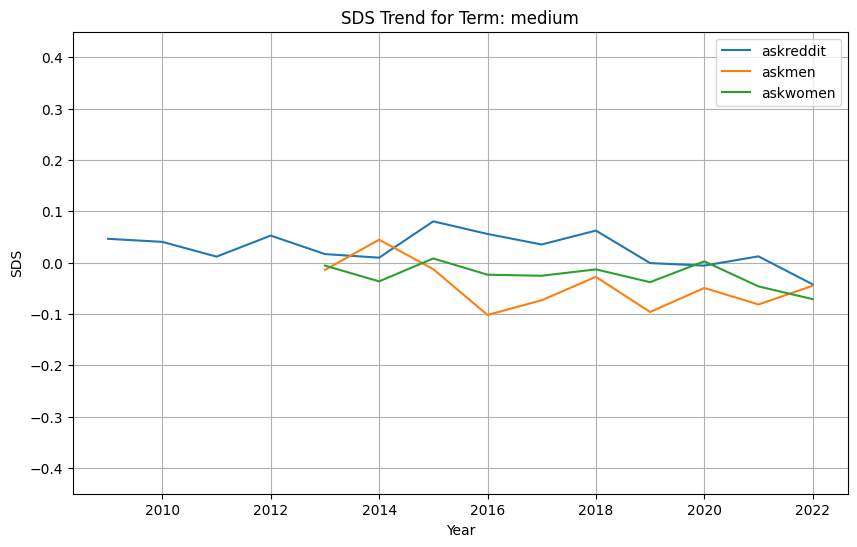

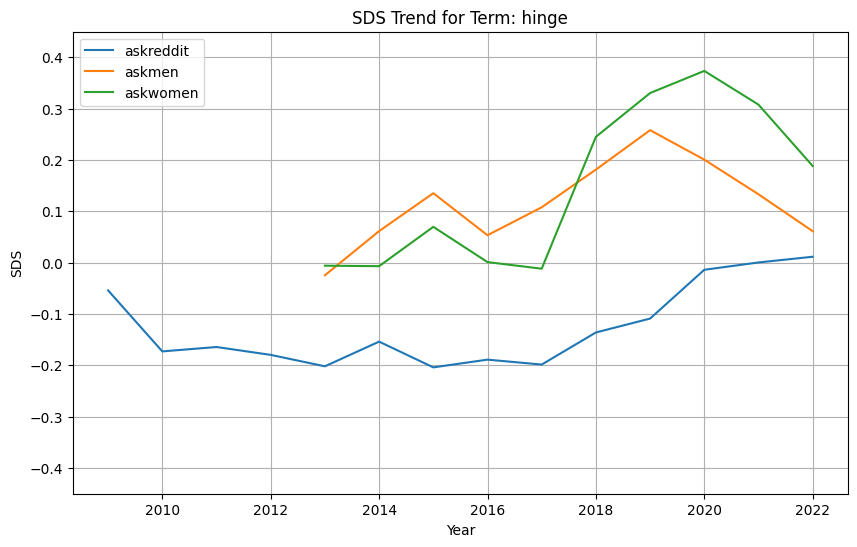

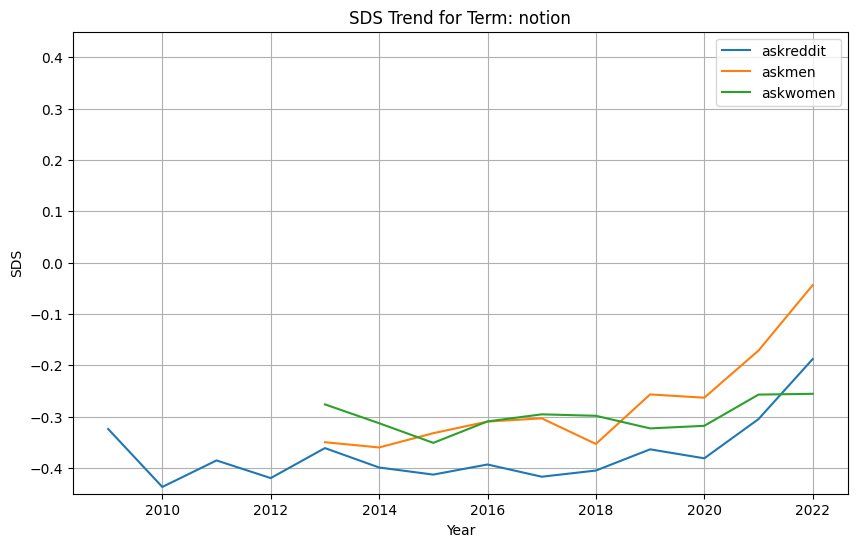

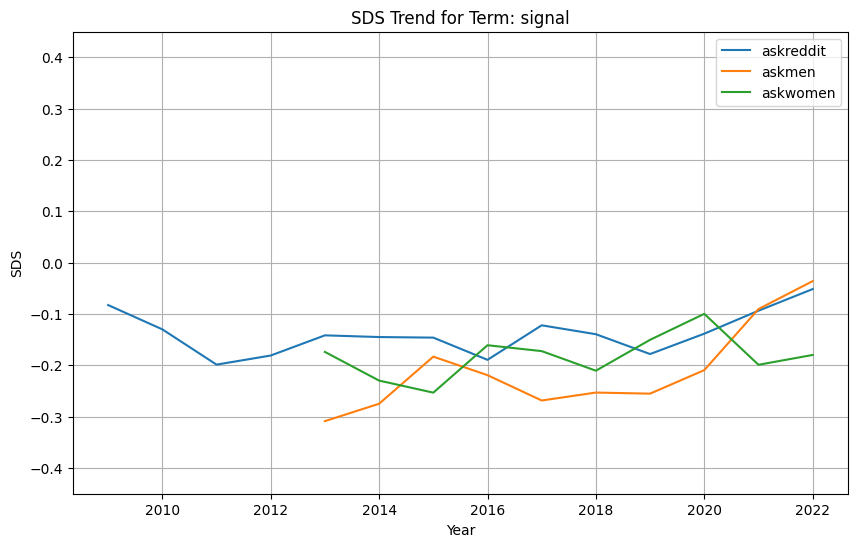

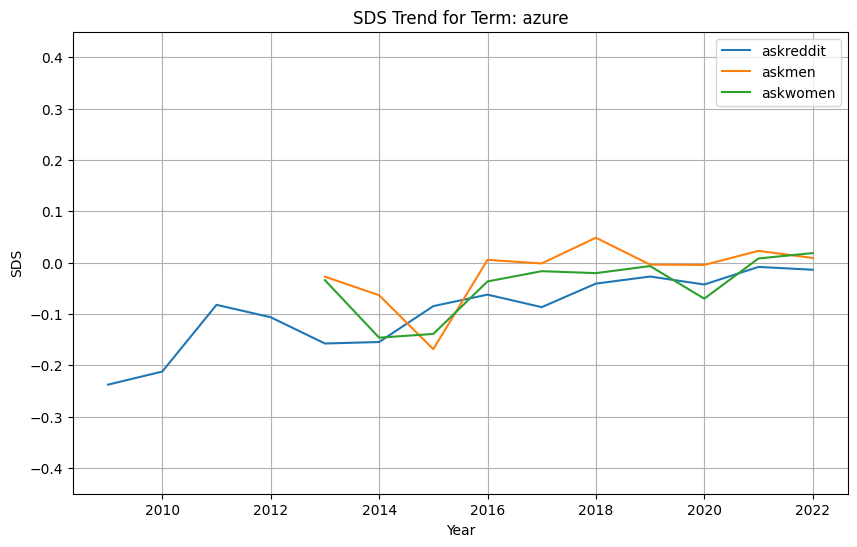

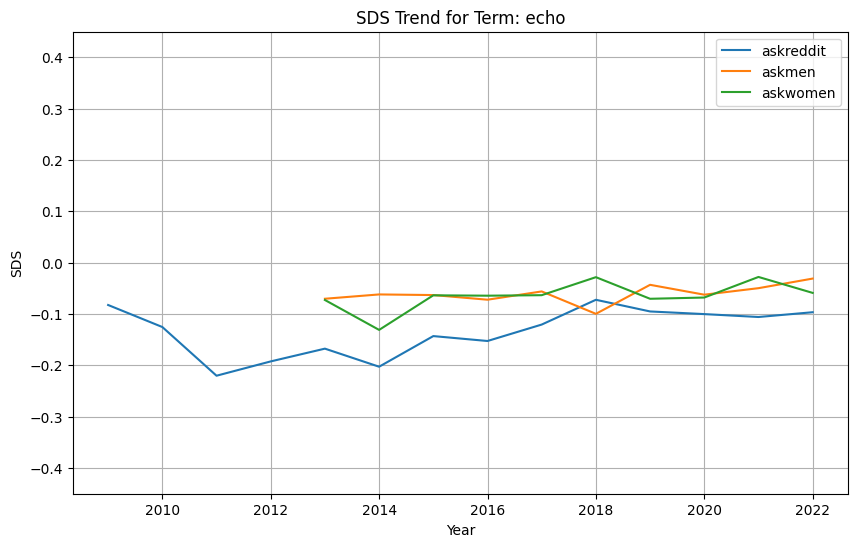

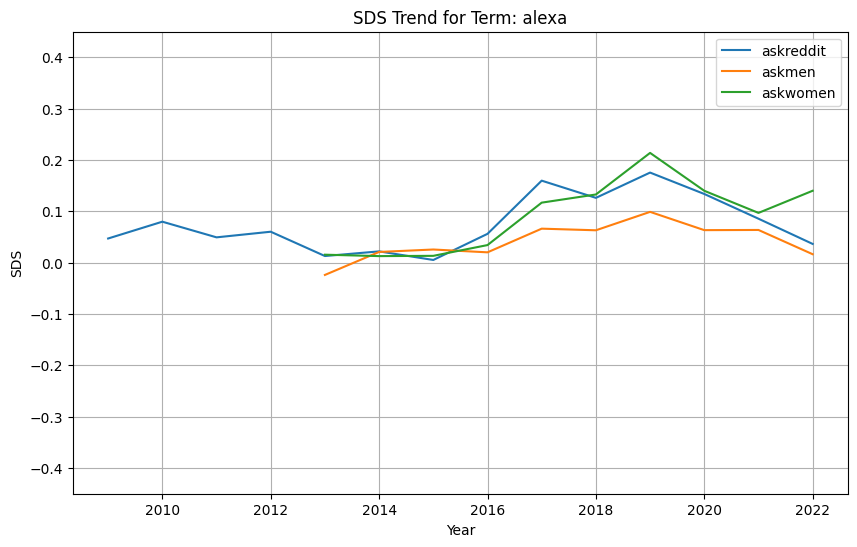

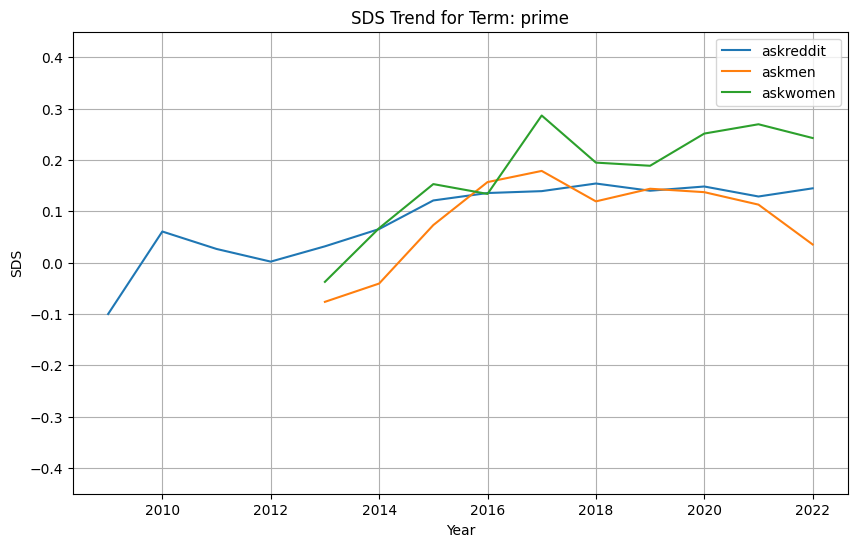

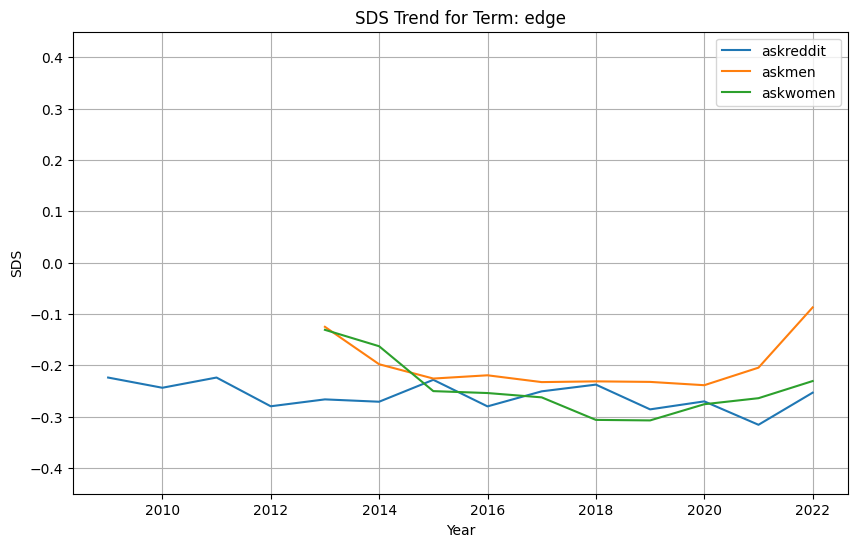

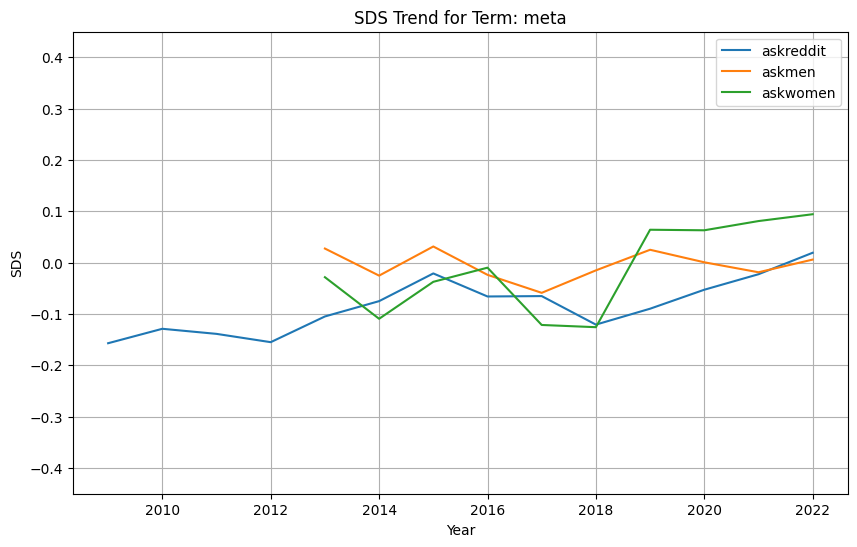

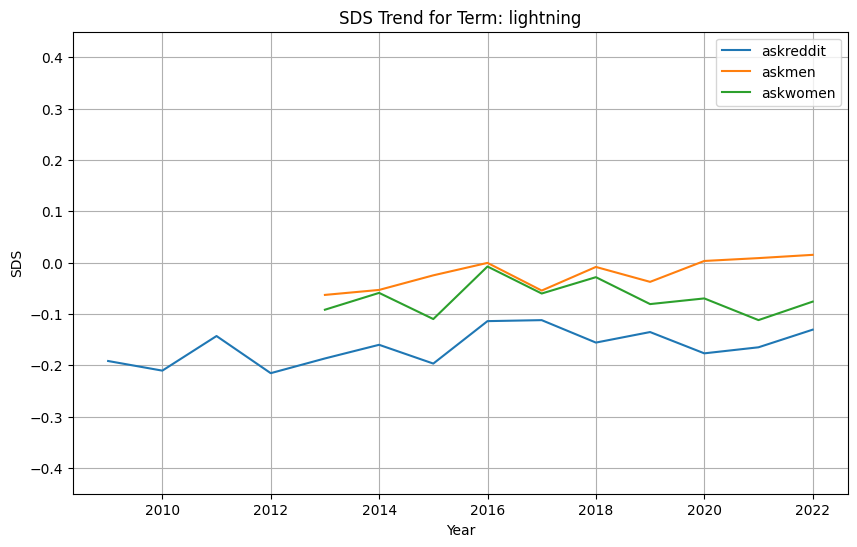

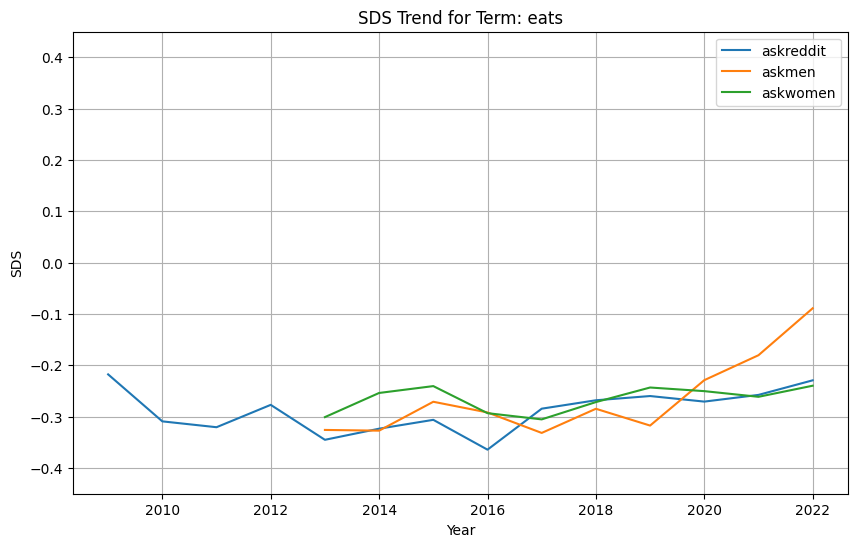

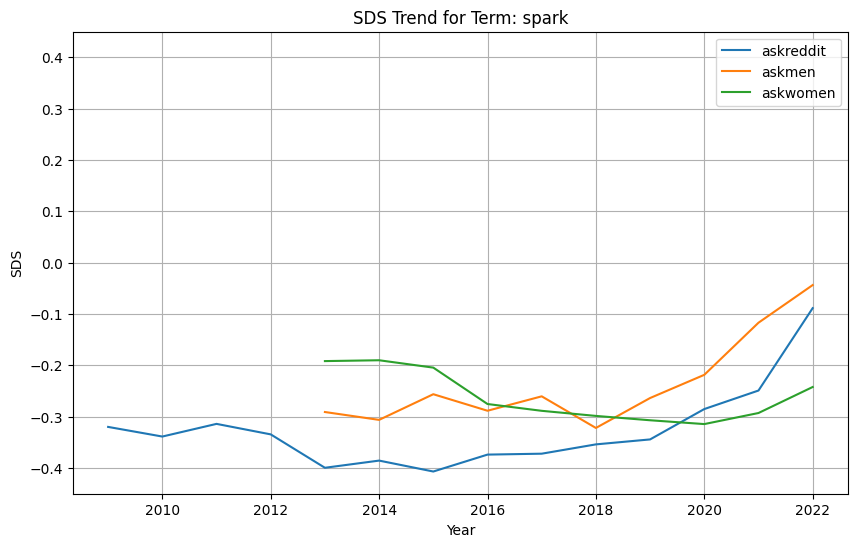

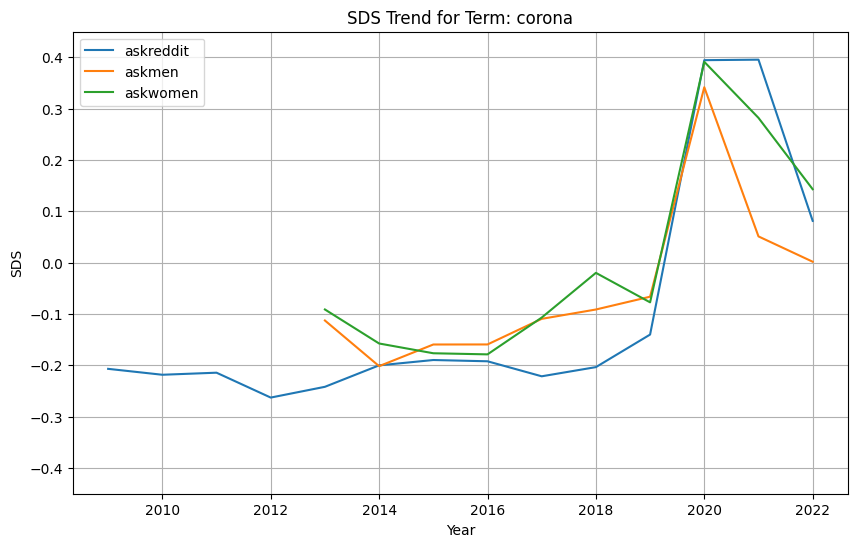

In [40]:

import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Lists to collect dataset-wide similarities for each model
dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    plt.figure(figsize=(10, 6))
    
    for model_path in model_paths:
        # Load the model
        model = gensim.models.Word2Vec.load(model_path)

        # Check if the model is GENERAL or GENDERED
        if f'{term}_2009' in model.wv.key_to_index:
            model_type = 'GENERAL'
            year_range = range(2009, 2023)
            type_suffixes = ['']
        else:
            model_type = 'GENDERED'
            year_range = range(2013, 2023)
            type_suffixes = ['askmen', 'askwomen']

        # Compute before and after vectors
        before_vector = compute_average_vector(before_words, model)
        after_vector = compute_average_vector(after_words, model)
        if before_vector is None or after_vector is None:
            continue  # Skip to next iteration if either vector is None

        # Compute projection vector
        projection_vector = after_vector - before_vector

        for type_suffix in type_suffixes:
            term_similarities_by_year = []

            for year in year_range:
                term_year = f'{type_suffix}_{term}_{year}'.strip('_')
                if term_year in model.wv.key_to_index:
                    term_vector = model.wv[term_year]
                    similarity = 1 - cosine(projection_vector, term_vector)
                    term_similarities_by_year.append(similarity)
                    dataset_similarities_by_model[model_path][year].append(similarity)
                else:
                    term_similarities_by_year.append(None)

            # Compute and print Spearman and Pearson correlations
            # Note: You should handle None values appropriately here
            valid_similarities = [s for s in term_similarities_by_year if s is not None]
            valid_years = [year for year, s in zip(year_range, term_similarities_by_year) if s is not None]
            if valid_similarities:
                spearman_corr, spearman_p_value = spearmanr(valid_similarities, valid_years)
                pearson_corr, pearson_p_value = pearsonr(valid_similarities, valid_years)

                print(f"Term:{term}")
                # print(f"For model at {model_path}, term {term} ({'GENERAL' if type_suffix == '' else type_suffix}):")
                print(f"{'askreddit' if type_suffix == '' else type_suffix}):")

                print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
                # print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

            # Plot
            plt.plot(valid_years, valid_similarities, label=f"{'askreddit' if type_suffix == '' else type_suffix}")
            # plt.plot(valid_years, valid_similarities, label=f"Model: {model_path.split('/')[-1]} ({'askreddit' if type_suffix == '' else type_suffix})")
    
    plt.xlabel('Year')
    plt.ylabel('SDS')
    plt.ylim(-0.45,0.45)
    plt.title(f'SDS Trend for Term: {term}')
    plt.legend()
    plt.grid(True)
    # plt.show()




Spearman Correlation for  in /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model: 0.9648351648351648, p-value: 2.5304057544450237e-08
Spearman Correlation for askmen in /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_gendered_word2vec_model_100_percent.model: 0.9515151515151514, p-value: 2.279854920641689e-05
Spearman Correlation for askwomen in /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_gendered_word2vec_model_100_percent.model: 0.9515151515151514, p-value: 2.279854920641689e-05


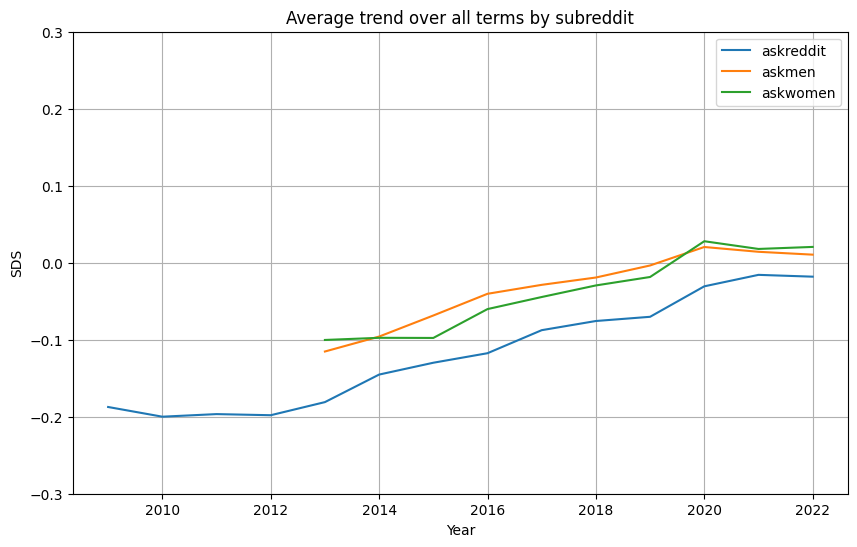

In [43]:

# Lists to collect dataset-wide similarities for each model
dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    for model_path in model_paths:
        # Load the model
        model = gensim.models.Word2Vec.load(model_path)

        # Check if the model is GENERAL or GENDERED
        if f'{term}_2009' in model.wv.key_to_index:
            model_type = 'GENERAL'
            year_range = range(2009, 2023)
            type_suffixes = ['']
        else:
            model_type = 'GENDERED'
            year_range = range(2013, 2023)
            type_suffixes = ['askmen', 'askwomen']

        # Compute before and after vectors
        before_vector = compute_average_vector(before_words, model)
        after_vector = compute_average_vector(after_words, model)
        if before_vector is None or after_vector is None:
            continue  # Skip to next iteration if either vector is None

        # Compute projection vector
        projection_vector = after_vector - before_vector

        for type_suffix in type_suffixes:
            for year in year_range:
                term_year = f'{type_suffix}_{term}_{year}'.strip('_')
                if term_year in model.wv.key_to_index:
                    term_vector = model.wv[term_year]
                    similarity = 1 - cosine(projection_vector, term_vector)
                    dataset_similarities_by_model[model_path][type_suffix].append((year, similarity))

# Plotting the average similarity per year for each type suffix
plt.figure(figsize=(10, 6))
for model_path in model_paths:
    for type_suffix in ['', 'askmen', 'askwomen']:
        if type_suffix == '':
            year_range = range(2009, 2023)
        else:
            year_range = range(2013, 2023)

        yearly_averages = []
        for year in year_range:
            year_similarities = [sim for y, sim in dataset_similarities_by_model[model_path][type_suffix] if y == year]
            if year_similarities:
                yearly_averages.append(np.mean(year_similarities))

        # Calculate and print Spearman correlation
        if yearly_averages:
            s = "askreddit"
            spearman_corr, spearman_p_value = spearmanr(list(year_range), yearly_averages)
            print(f"Spearman Correlation for {type_suffix} in {model_path}: {spearman_corr}, p-value: {spearman_p_value}")
            plt.plot(list(year_range), yearly_averages, label=f"{type_suffix if type_suffix else s}")

plt.xlabel('Year')
plt.ylim(-0.3,0.3)
plt.ylabel('SDS')
plt.title('Average trend over all terms by subreddit')
plt.legend()
plt.grid(True)
plt.show()
